##### Files Submitted & Code Quality

##### 1. Submission includes all required files and can be used to run the simulator in autonomous mode

My project consists of the following files:
    
    * model.py - the neural network
    * utils.py - preprocessing utils including data augmentation functions
    * generator.py - batch generator that augments training data
    * model3_07.h5 - trained model
    * writeup.ipynb - this writeup report
    * track1.mp4 - video of the track 1 run
    * track2.mp4 - video of the track 1 run
    * drive.py - modified drive telemetry and control program with speed set to 18 mph for track 1. It drives reasonably well although there is more sverving around the curves at higher speed. For track2, thes speed is lowered to 15 mph, throttle to 0.3 and the steering angles increased by a constant factor to compensate for the sharp turns.

#### 2. Submssion includes functional code Using the Udacity provided simulator and my drive.py file, the car can be driven autonomously around the track by executing

python drive.py model3_07.h5
    

#### 3. Submission code is usable and readable

Yes. the code is appropiately commented

#### Model Architecture and Training Strategy
##### 1. An appropriate model architecture has been employed

The model is a variant of the NVIDIA model which is a normalisation layer followed by 5 convolution layers and 3 fully connected layers. My model starts with a cropping layer, normalisation and a resizing layer based on AveragePooling. This could be done in the preprocessing shape but it seems more readable and probably more efficient (use of GPU in training) to put it in the ANN. In the preprocessing pipline, I load one of the 3 camera angle at random with a shift ajustedment to account for the left and right camera offset. I also augment the data at random  by adding brighness jitters, dark shadows, horizon shears, shadows and flips to desensitise the model to lighting conditions, balance the road topology. The flips are strictly not needed as I also drove some laps in reverse to account the dominance of left handed turns.

#### 2. Attempts to reduce overfitting in the model
The raw data was shuffled and split into training and validation sets. A dropout layers was also used to prevents overfitting.

#### 3. Model parameter tuning
For the loss function I used MSE and used the ADAM optimiser with a low initial learning rate.The Adam optimizer as compared to SGD automatically adjusts the learning rate over epochs unlike SGD.

#### 4. Appropriate training data
I initially used the UDacity supplied data set, using all the 3 camera angles with the shift adjustments. The car drove adequately around the first track but drove off track immediately on the second validation track. I then logged my own driving data, driving a few laps but essentially sticking to the middle of the track. THis generated about 9000 odd records.  I also drove the lap backwards to balance the left and right turns. More details about the training data generation can be found in the later sections.


#### Model Architecture and Training Strategy

##### 1. Solution Design Approach

I based the network architecture on Nvidia's  which has 9 layers, including a normalization layer, 5 convolutional layers, and 3 fully-connected layers. I used this architecture because it has been used in this class of problems and in general it with differented  expeperformed well for this track. I experimented with different width and depth of the network, dropout layers, and non-linearities but essentially sticking to the Nvidia pattern. The final architecture was limited by time and number of runs I could manage on my laptop. Finally, the epoch was set at 10 as the loss flattened out at around 8-10 epochs.

#### 2. Final Model Architecture
Here is a print out of model.summary in Keras.

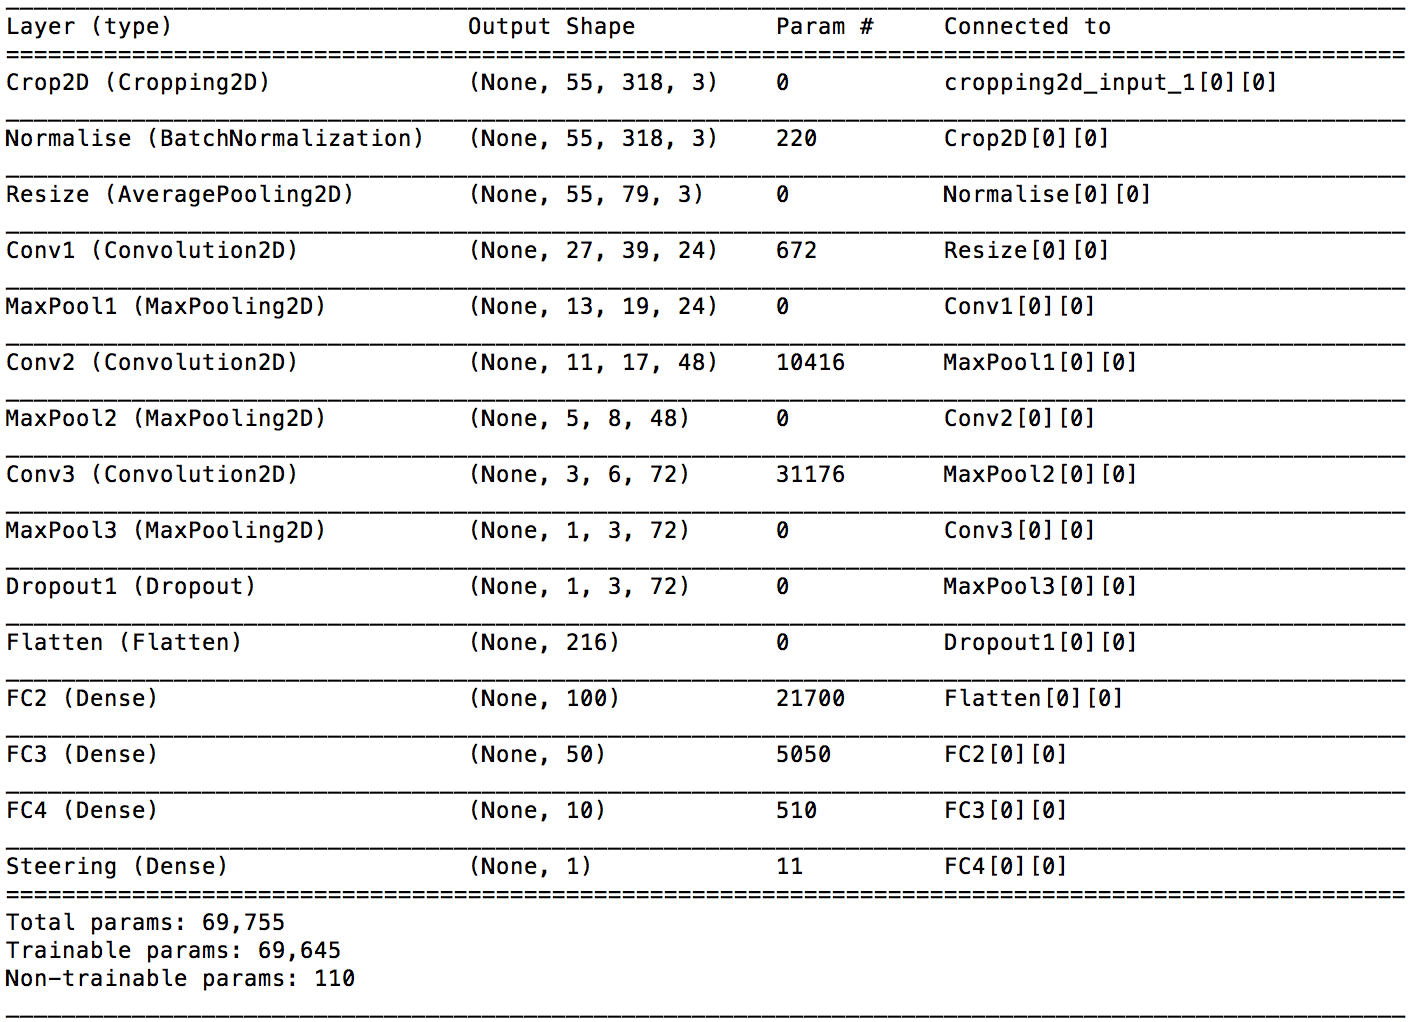

In [2]:
from IPython.display import Image
Image(filename='model2.png')

#### 3. Creation of the Training Set & Training Process

The training data was generated by driving a few laps, largely in the middle of the track. However, on inspection of the data by plotting on a histogram (see below), it was clear that the data was dominated by the straight lanes with very little steering. The data is dominated by small steering angles because the car spends most of its time on the track in straightaways. 

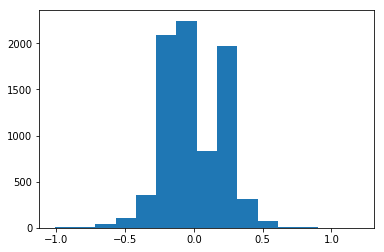

In [3]:
from IPython.display import Image
Image(filename='Hist_orig.png')

To dilute this skewness, a pipeline of augmentation was applied. This included random sequences of flipping, shadows, shears and brightness adjustments. The results of this pipline is illustrated in the grid immage below which shows the transforms applied to 16 images picked at random.


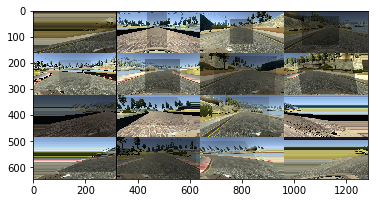

In [4]:
from IPython.display import Image
Image(filename='Augmentation.png')

The augmentation resulted in a much more uniform distibution of steering angles as illustrated below. 

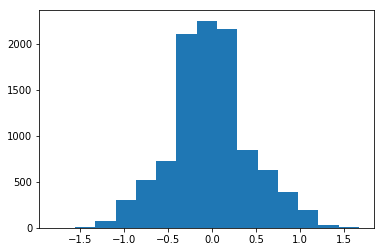

In [5]:
from IPython.display import Image
Image(filename='AugmentHistogram.png')

It must be mentioned that the above histogram is the rsult of one run of transform against the raw records. Because we use a generator pattern, the augmentation run on each batch request on the generator and will therefore produces almost an infinite set of augmentations for every batch and for every epoch run. Howver, we shoudl expect to have the same uniform distribution as above. I set the Epoch at 8 because the training loss stopped decreasing around the 7 mark and cutting down the loss too much would have meant overtraining the model on track 1. I set the speed  to 18 mph for track 1. It drives reasonably well although there is more sverving around the curves at higher speed. For track2, thes speed is lowered to 15 mph, throttle to 0.3 and the steering angles increased by a constant factor to compensate for the sharp turns.